In [1]:
import atlasopenmagic as atom
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = uproot.open('DAOD_PHYSLITE.38191914._000036.pool.root (1).1') #dosyayı açtık
tree = file['CollectionTree']

In [3]:
pt = tree["AnalysisPhotonsAuxDyn.pt"].array()
eta = tree["AnalysisPhotonsAuxDyn.eta"].array()
phi = tree["AnalysisPhotonsAuxDyn.phi"].array()
mass = tree["AnalysisPhotonsAuxDyn.m"].array()

ptcone20 = tree["AnalysisPhotonsAuxDyn.ptcone20_CloseByCorr"].array()
topoetcone20 = tree["AnalysisPhotonsAuxDyn.topoetcone20_CloseByCorr"].array()
topoetcone40 = tree["AnalysisPhotonsAuxDyn.topoetcone40_CloseByCorr"].array()

f1 = tree["AnalysisPhotonsAuxDyn.f1"].array()

cleaning = tree["AnalysisPhotonsAuxDyn.DFCommonPhotonsCleaning"].array()
isEMTight = tree["AnalysisPhotonsAuxDyn.DFCommonPhotonsIsEMTight"].array()

OQ = tree["AnalysisPhotonsAuxDyn.OQ"].array()

truthType = tree["AnalysisPhotonsAuxDyn.truthType"].array()
truthOrigin = tree["AnalysisPhotonsAuxDyn.truthOrigin"]. array()

In [4]:
pt_np = ak.flatten(pt).to_numpy()
eta_np = ak.flatten(eta).to_numpy()
phi_np = ak.flatten(phi).to_numpy()
mass_np = ak.flatten(mass).to_numpy()

In [5]:
truthType_np= ak.flatten(truthType).to_numpy()
truthOrigin_np= ak.flatten(truthOrigin).to_numpy()

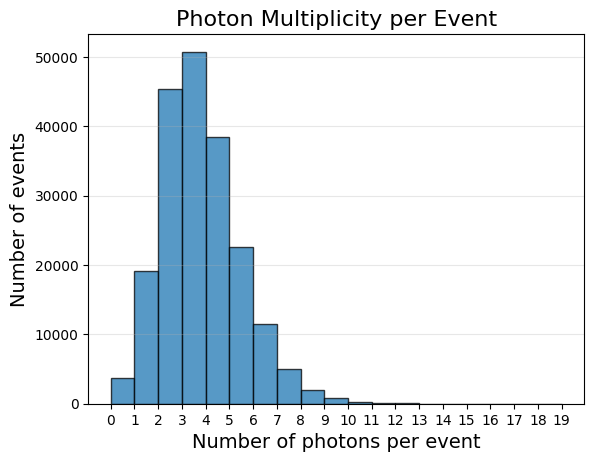

In [8]:
photons_per_event = ak.num(pt) # ak.num --->  Jagged array'in her "satırında" (event'inde) kaç eleman olduğunu sayar
plt. hist(photons_per_event, bins=range(0, 20), edgecolor='black', alpha=0.75)
plt.xlabel('Number of photons per event', fontsize=14)
plt.ylabel('Number of events', fontsize=14)
plt.title('Photon Multiplicity per Event', fontsize=16)
plt. xticks(range(0, 20, 1))
plt.grid(alpha=0.3, axis='y')
plt.show()


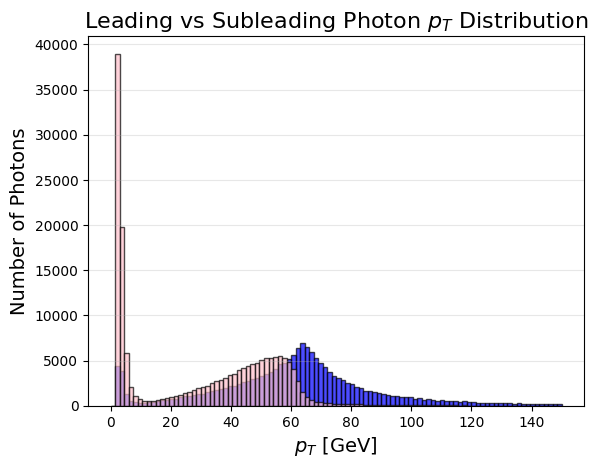

In [10]:
# Leading (en yüksek pT) ve Subleading (ikinci en yüksek pT)
event_with_2plus_photons = pt[ak.num(pt) >= 2]
leading_pt = event_with_2plus_photons[:, 0] /1000
subleading_pt = event_with_2plus_photons[:, 1] / 1000

plt.hist(leading_pt, bins=100, range=(0,150), alpha=0.7, label='Leading Photon pT', color='blue', edgecolor='black')
plt.hist(subleading_pt, bins=100, range=(0,150), alpha=0.7, label='Subleading Photon pT', color='pink', edgecolor='black')
plt.xlabel('$p_T$ [GeV]', fontsize=14)
plt.ylabel('Number of Photons', fontsize=14)
plt.title('Leading vs Subleading Photon $p_T$ Distribution', fontsize=16)
plt. grid(alpha=0.3, axis='y')
plt.show()
